In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from mie_funzie import show_multiple_img

In [2]:
ds = load_digits()
ds

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(ds.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
ds.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

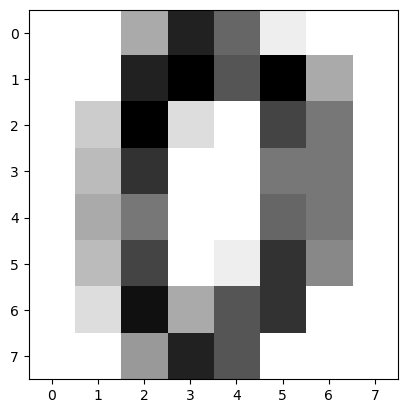

In [6]:
plt.imshow(ds.images[0],cmap= 'gray_r'); # la prima immagine sembra essere uno zero 

In [7]:
ds.target[0] # chiediamo a target che numero è

0

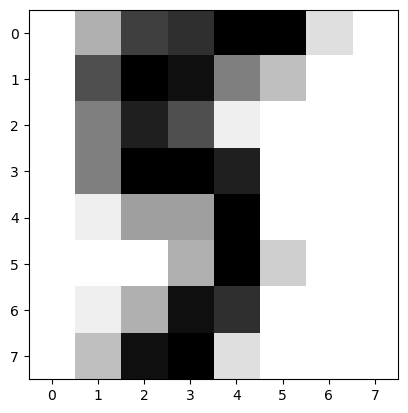

In [8]:
plt.imshow(ds.images[15],cmap= 'gray_r'); # è un 5

In [9]:
ds.target[15] # chiediamo a target che numero è

5

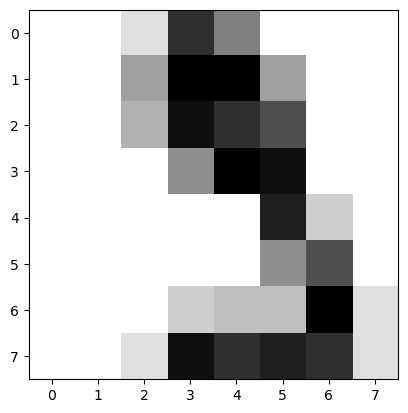

In [10]:
plt.imshow(ds.images[31],cmap= 'gray_r'); # è un 9 forse?

In [11]:
ds.target[31] # chiediamo a target che numero è

9

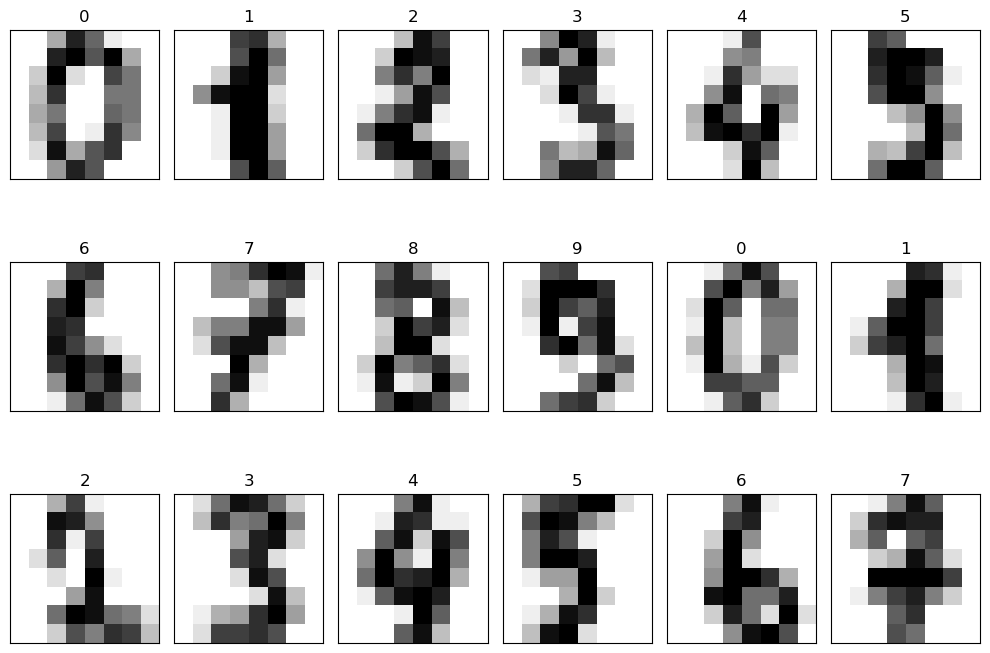

In [12]:
show_multiple_img(ds.images[0:18],ds.target[0:18])

In [13]:
print(ds.data[0]) # struttura pronta per analisi con algoritmo
ds.images[0] # struttura pronta per visualizzare le immagini 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
ds.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
come_data = ds.images[0].reshape([1,-1])[0]
print(come_data)
ds.data[0]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
df = pd.DataFrame(ds.data, columns=ds.feature_names) # trasformo i dati delle immagini in un data set usando pandas
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [17]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [18]:
df.shape

(1797, 64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [20]:
df.isnull().count()

pixel_0_0    1797
pixel_0_1    1797
pixel_0_2    1797
pixel_0_3    1797
pixel_0_4    1797
             ... 
pixel_7_3    1797
pixel_7_4    1797
pixel_7_5    1797
pixel_7_6    1797
pixel_7_7    1797
Length: 64, dtype: int64

In [21]:
target_df = pd.DataFrame(ds.target)
target_df

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [22]:
target_df.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [23]:
pd.set_option('display.max_row',20) # mi dovrebbe permettere di regolare quante righe mostra il describe forse
df.T.describe().T

,count,mean,std,min,25%,50%,75%,max
0,64.0,4.593750,5.224238,0.0,0.0,2.0,9.00,15.0
1,64.0,4.890625,6.520096,0.0,0.0,0.0,11.00,16.0
2,64.0,5.375000,6.348353,0.0,0.0,1.0,11.25,16.0
3,64.0,4.171875,5.402982,0.0,0.0,1.0,8.25,15.0
4,64.0,4.031250,5.681965,0.0,0.0,0.0,7.25,16.0
...,...,...,...,...,...,...,...,...
1792,64.0,5.312500,6.179523,0.0,0.0,3.5,10.50,16.0
1793,64.0,6.234375,6.541060,0.0,0.0,5.0,13.25,16.0
1794,64.0,5.843750,6.792196,0.0,0.0,1.0,14.25,16.0
1795,64.0,5.375000,6.257694,0.0,0.0,2.5,10.50,16.0


In [24]:
df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [25]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [26]:
# train test split

from sklearn.model_selection import train_test_split
seed = 42 # definisco una variabile seed che userò quanod mi servirà Arithmethic error

In [27]:
x = ds.data
y = ds.target

In [28]:
#x = df            
#y = target_df  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y , random_state=seed)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

array([5, 2, 0, ..., 2, 7, 1])

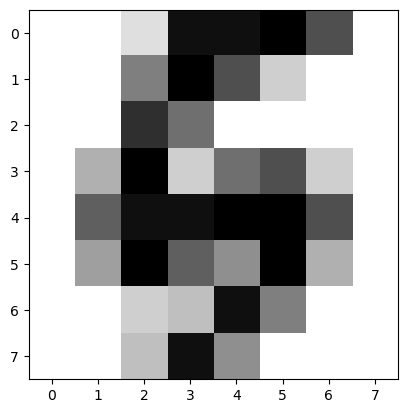

In [31]:
plt.imshow(np.array(X_train)[0].reshape(8,8),cmap='gray_r');
y_train

In [32]:
target_df.dtypes

0    int64
dtype: object

# Impostiamo il problema di machine learning

## Inseriamo Scaler? In questo caso i nostri valori sono già in un range definito da 0 a 16.
### Però non è detto che normalizzando non funzioni meglio o magari cambiando il seed randomizziamo 
### meglio i data sets.
## Proviamo senza normalizzare.

### Scegliamo di non effettuare lo scaling perché siamo già in un range definito da 0 a 16.

# Che algoritmo di classificazione usiamo?
## Ne modifico qualche parametro per farlo funzionare meglio?

In [33]:
from sklearn.linear_model import SGDClassifier

In [34]:
SGDC_classifier = SGDClassifier()

SGDC_classifier.fit(X_train,y_train)

prediction = SGDC_classifier.predict(X_train);

In [35]:
prediction[:30]

array([5, 2, 0, 8, 7, 3, 7, 0, 2, 2, 3, 5, 8, 7, 3, 6, 5, 9, 9, 2, 5, 6,
       3, 0, 7, 1, 1, 9, 6, 1])

In [36]:
y_train[:30]

array([5, 2, 0, 8, 7, 3, 7, 0, 2, 2, 3, 5, 8, 7, 3, 6, 5, 9, 9, 2, 5, 6,
       3, 0, 7, 1, 1, 9, 6, 1])

In [37]:
SGDC_classifier.score(X_train,y_train)

0.9792130660727543

In [38]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(SGDC_classifier, X_train, y_train, cv=10)
score.mean()

0.9376616915422886

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

errors = sqrt(mean_squared_error(y_train, prediction))
print(errors)

0.7994987293691005


In [40]:
SGDC_classifier.score(X_test,y_test)

0.9577777777777777

In [41]:
test_prediction = SGDC_classifier.predict(X_test);
print(test_prediction)
y_test

[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 8 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 5 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 8 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 8 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 8 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 2 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [42]:
y_failed = y_test[y_test != test_prediction]
y_failed_predetti = test_prediction[y_test != test_prediction]
y_failed

array([9, 0, 3, 7, 3, 9, 3, 9, 4, 5, 8, 6, 9, 1, 1, 8, 4, 1, 3])

In [43]:
x_failed = X_test[y_test != test_prediction]
x_failed

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  1.,  9., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [44]:
failed_images = x_failed.reshape(x_failed.shape[0],8,8)

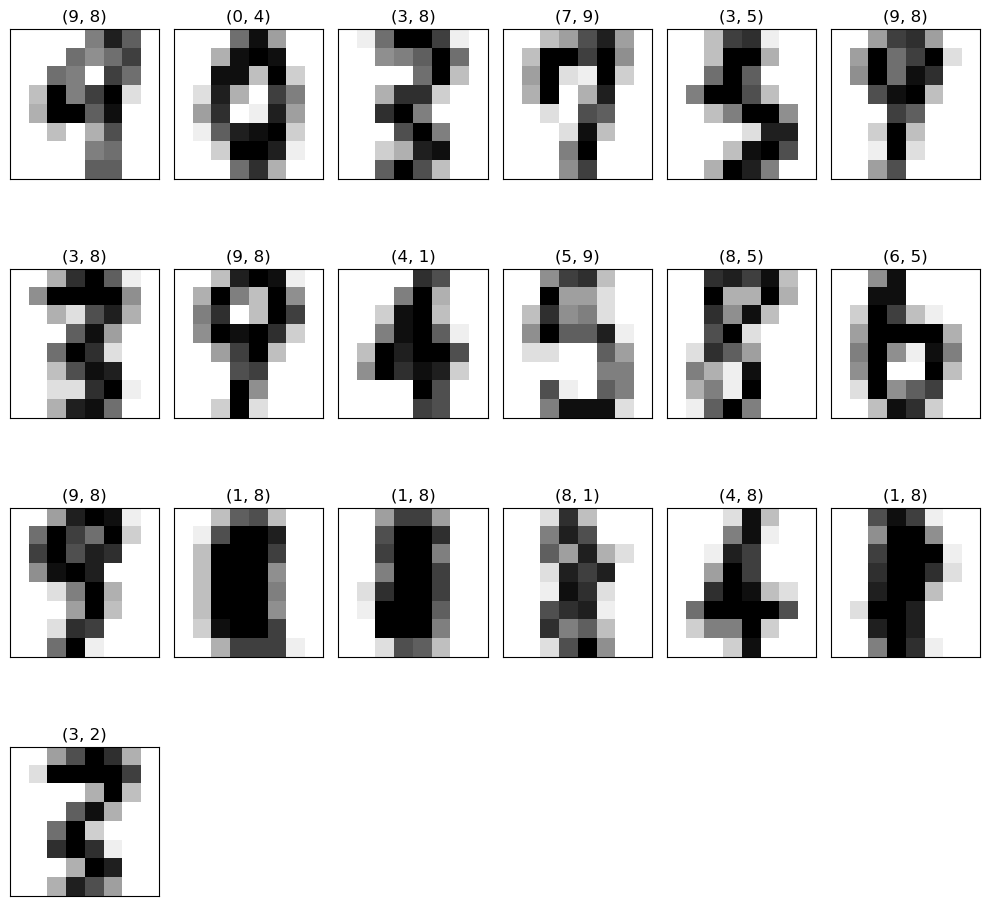

In [45]:
show_multiple_img(failed_images,zip(y_failed,y_failed_predetti))

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Kn_classifier = KNeighborsClassifier()

Kn_classifier.fit(X_train,y_train)

prediction = Kn_classifier.predict(X_train);

print(Kn_classifier.score(X_train,y_train))
score = cross_val_score(Kn_classifier, X_train, y_train, cv=10)
score.mean()

0.9888641425389755


0.9851464897733553

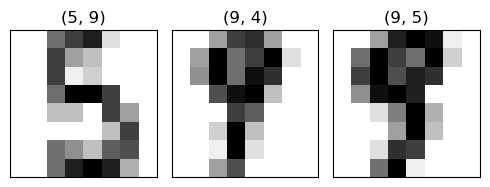

In [47]:
test_prediction = Kn_classifier.predict(X_test);

y_failed = y_test[y_test != test_prediction]
y_failed_predetti = test_prediction[y_test != test_prediction]
x_failed = X_test[y_test != test_prediction]
failed_images = x_failed.reshape(x_failed.shape[0],8,8)

show_multiple_img(failed_images,zip(y_failed,y_failed_predetti))

In [48]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gaussian = GaussianNB()

gaussian.fit(X_train,y_train)

prediction = gaussian.predict(X_train);

print(gaussian.score(X_train,y_train))
score = cross_val_score(gaussian, X_train, y_train, cv=10)
score.mean()

0.8574610244988864


0.8307517965726922

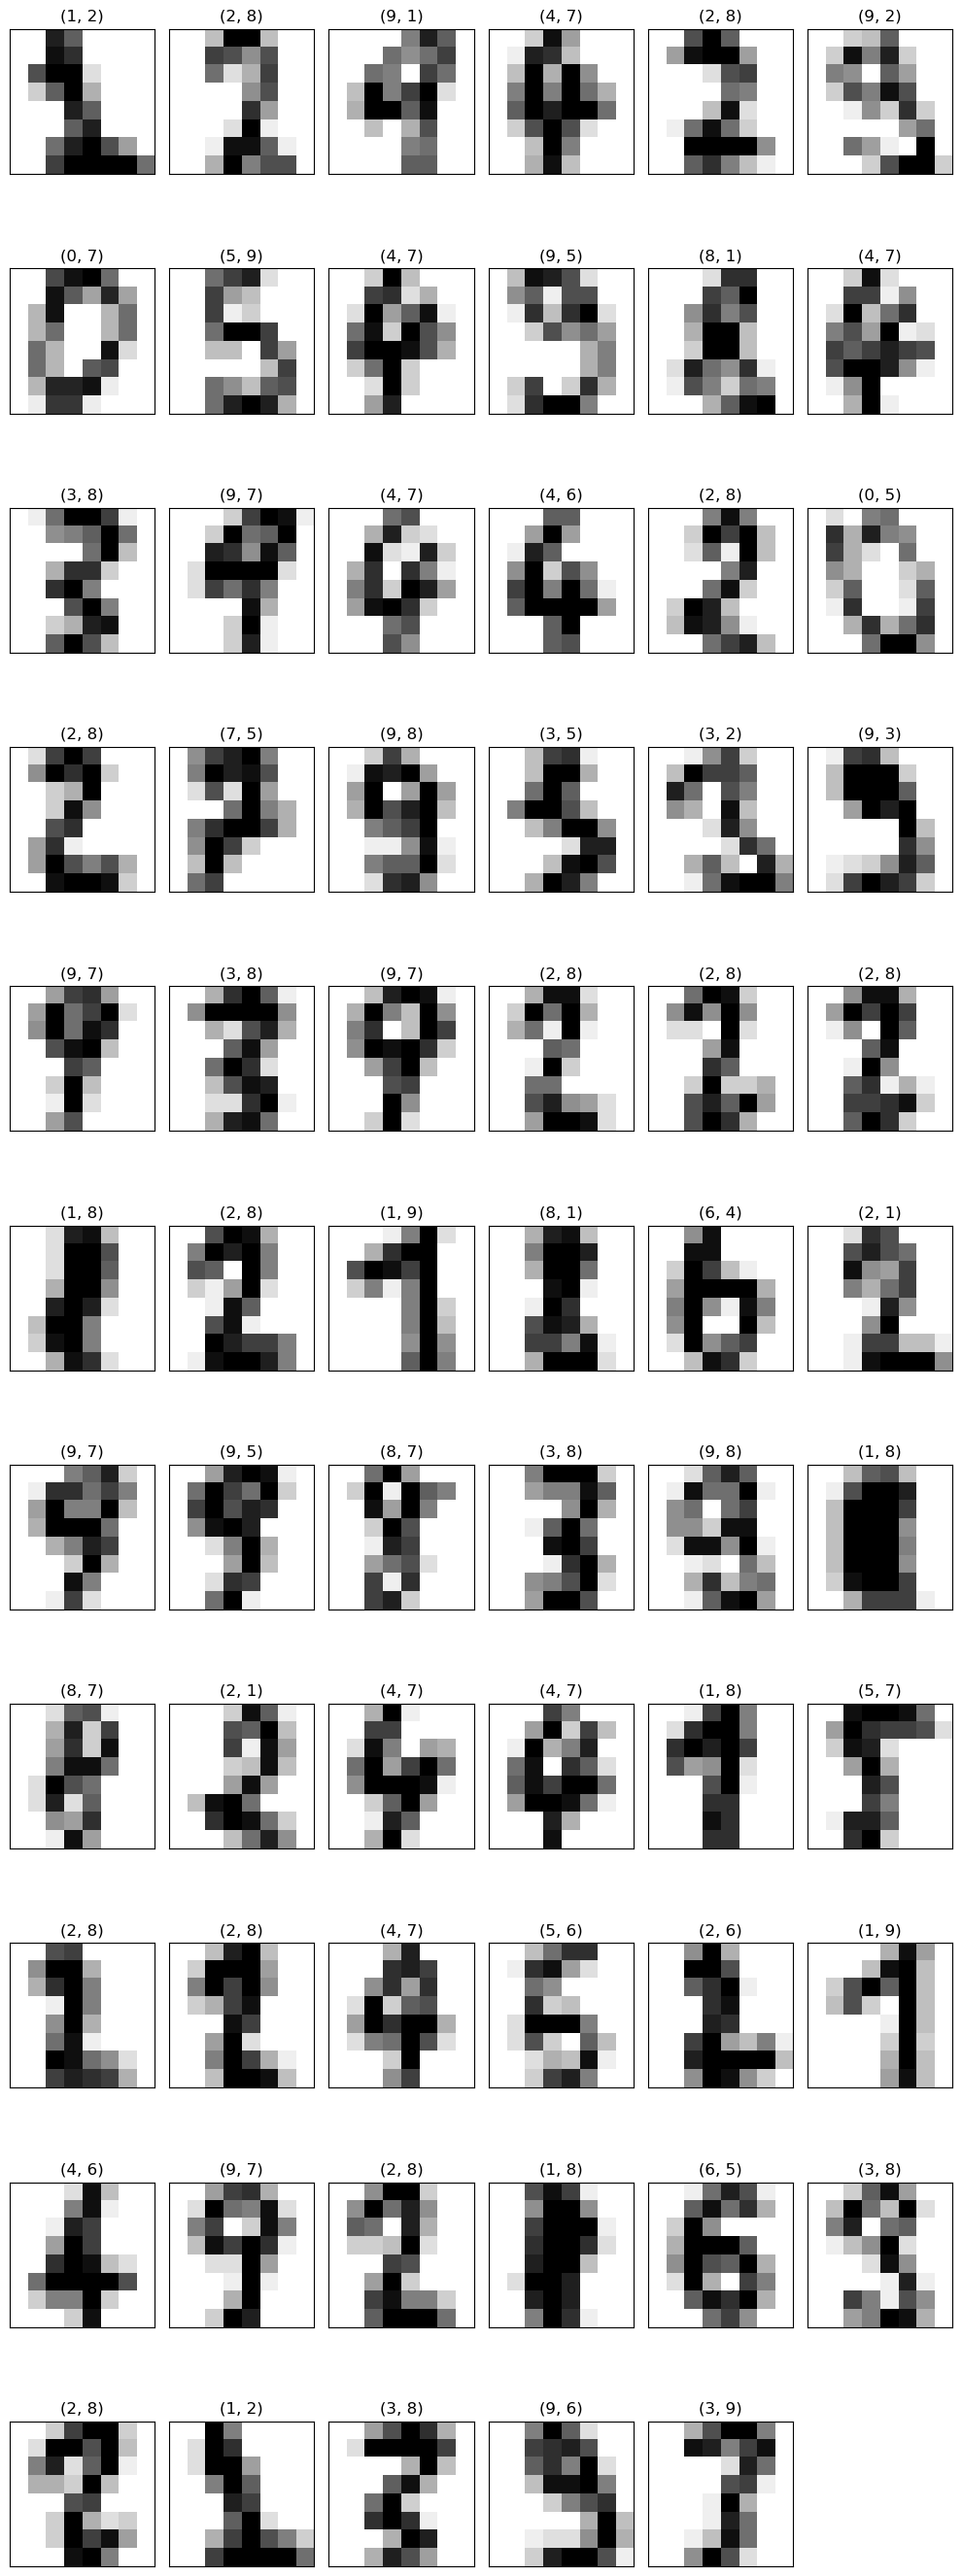

In [49]:
test_prediction = gaussian.predict(X_test);

y_failed = y_test[y_test != test_prediction]
y_failed_predetti = test_prediction[y_test != test_prediction]
x_failed = X_test[y_test != test_prediction]
failed_images = x_failed.reshape(x_failed.shape[0],8,8)

show_multiple_img(failed_images,zip(y_failed,y_failed_predetti))

In [50]:
bernulli = BernoulliNB()

bernulli.fit(X_train,y_train)

prediction = bernulli.predict(X_train);

print(bernulli.score(X_train,y_train))
score = cross_val_score(bernulli, X_train, y_train, cv=10)
score.mean()

0.8604305864884929


0.8448424543946933

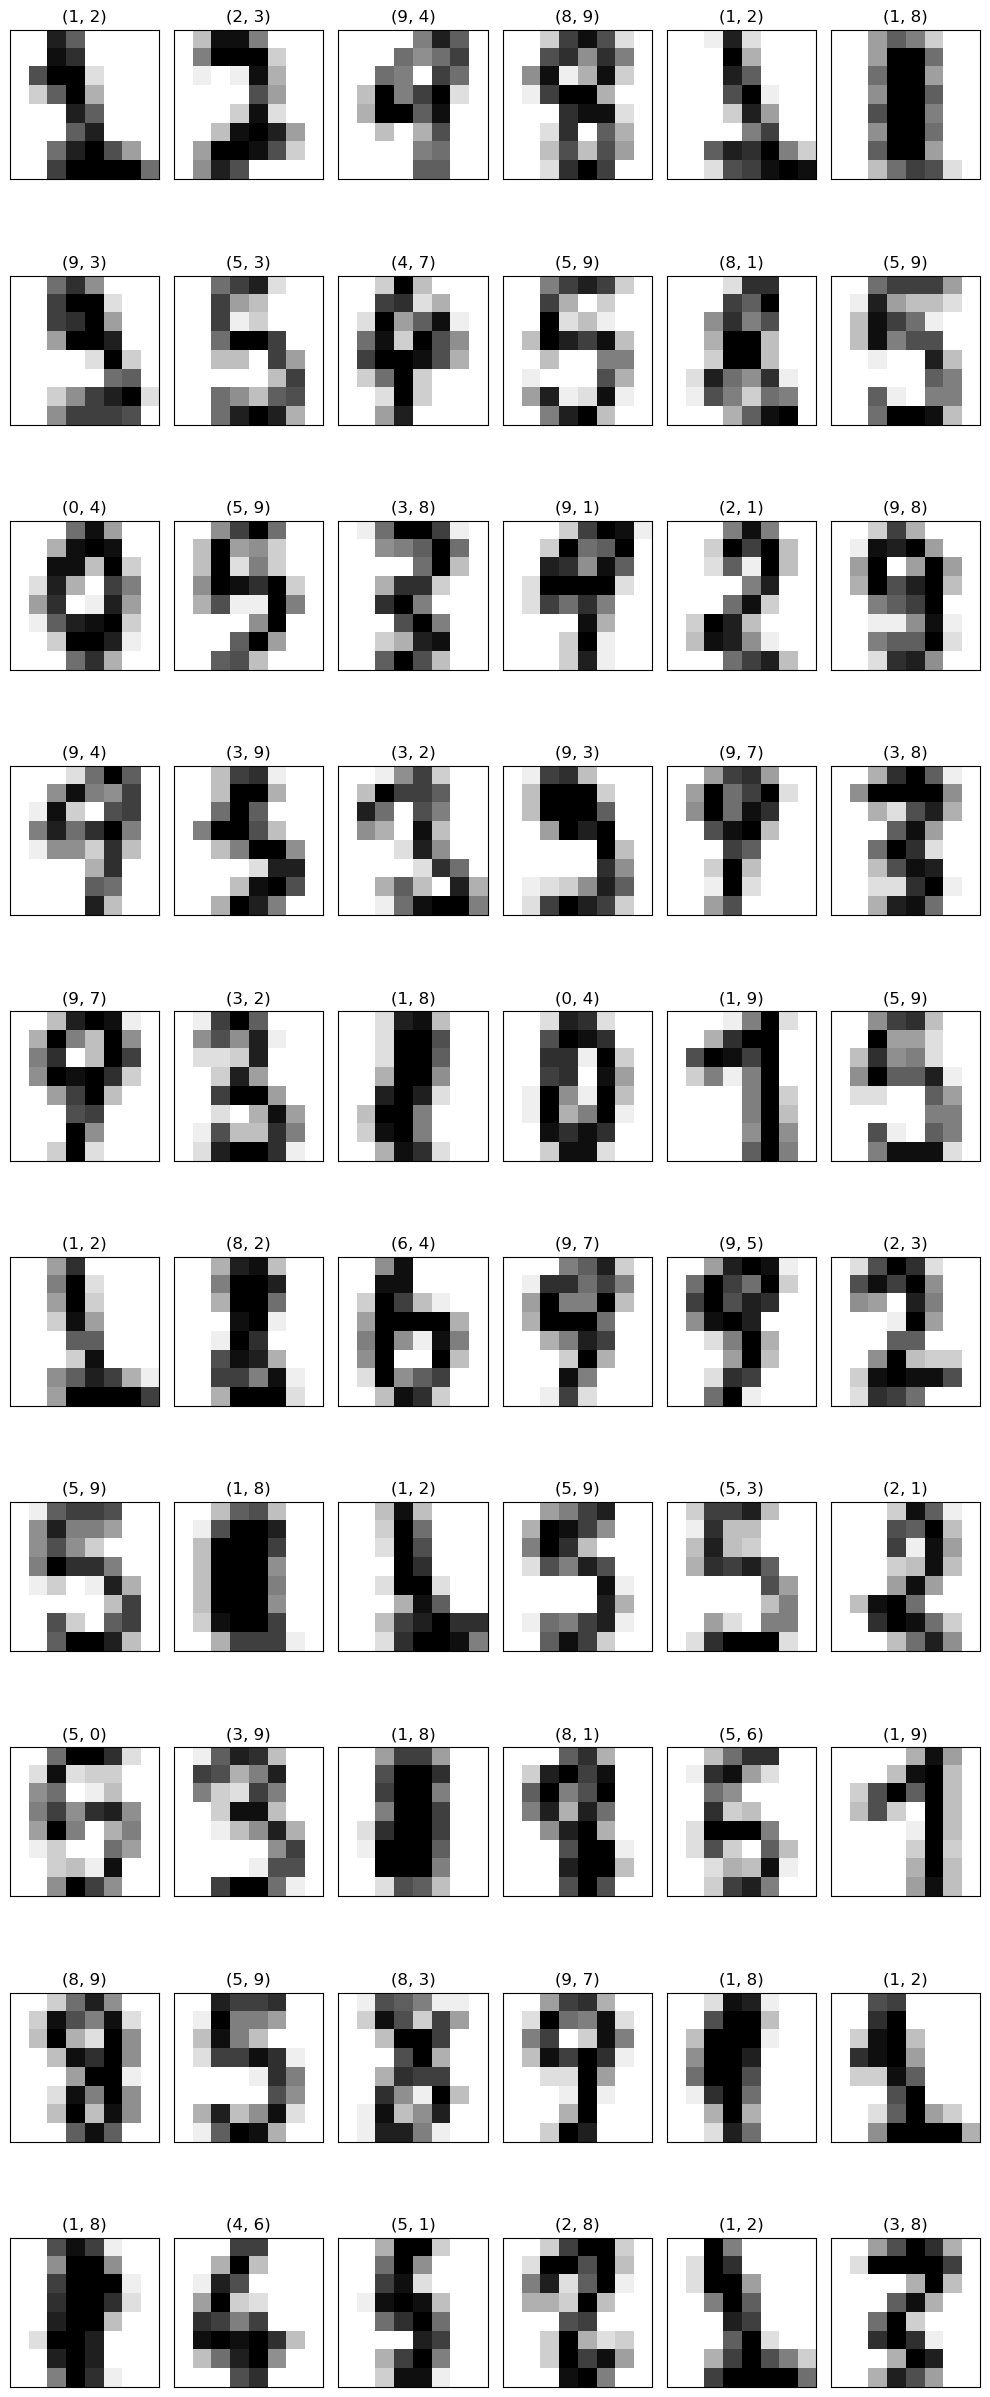

In [51]:
test_prediction = bernulli.predict(X_test);

y_failed = y_test[y_test != test_prediction]
y_failed_predetti = test_prediction[y_test != test_prediction]
x_failed = X_test[y_test != test_prediction]
failed_images = x_failed.reshape(x_failed.shape[0],8,8)

show_multiple_img(failed_images,zip(y_failed,y_failed_predetti))

In [57]:
from sklearn.svm import SVC

svc_classifier = SVC()

svc_classifier.fit(X_train,y_train)

prediction = svc_classifier.predict(X_train);

print(svc_classifier.score(X_train,y_train))
score = cross_val_score(svc_classifier, X_train, y_train, cv=10)
score.mean()

0.9962880475129918


0.9881260364842455

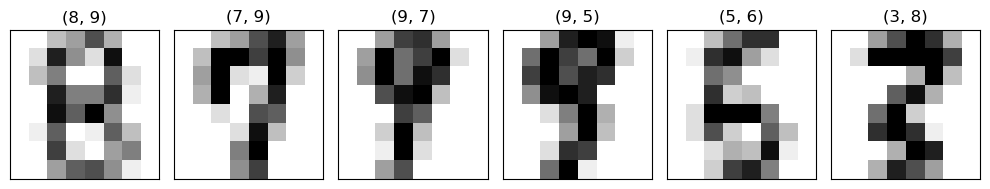

In [58]:
test_prediction = svc_classifier.predict(X_test);

y_failed = y_test[y_test != test_prediction]
y_failed_predetti = test_prediction[y_test != test_prediction]
x_failed = X_test[y_test != test_prediction]
failed_images = x_failed.reshape(x_failed.shape[0],8,8)

show_multiple_img(failed_images,zip(y_failed,y_failed_predetti))